**Grupo 1:
Andrea Morán Vargas
Pedro Vidal Orús

Proyecto: VeriFactura**

**Análisis Exploratorio de Datos**

Dado que actualmente no contamos con un dataset propiamente dicho, pues, en nuestro proyecto los datos se obtienen al extraer la información desde facturas emitidas de múltiples fuentes (etapa que está en construcción), hemos utilizado un Dataset, perteneciente a dos grupos con información definido: "COMPLETA" e "INCOMPLETA", el primero corresponde a facturas reales de Venta de Vehiculos y el segundo a facturas de repuestos con datos en su mayoría incompletos.

1. ANÁLISIS EXPLORATORIO

**1.1**. CARGA Y EXPLORACIÓN INICIAL

Manteniendo las instrucciones definidas iniciamos con la revisión de las tres primeras y últimas filas para familiarizarnos con la data.

In [ ]:
# Importar librerías necesarias
import scipy.stats as stats
import statsmodels.stats.weightstats as wsm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install numpy scipy statsmodels pandas
!pip install openpyxl

# Cargar el dataset
# Corrected file path - assuming the file is directly in the /content directory
file_path = "/content/sample_data/DATASET_2.csv"


# Load the dataset with semicolon delimiter
df = pd.read_csv(file_path, sep=';')


# Mostrar las primeras filas del dataset para familiarizarse
print("Primeras 3 filas del dataset:")
print(df.head(3))
# Mostrar las últimas filas del dataset para familiarizarse
print("Últimas 3 filas del dataset:")
print(df.tail(3))

Primeras 3 filas del dataset:
  FECHA_DOCUMENTO                                          DIRECCION  \
0      29/12/2023  Dir. Matriz: AVENIDA ATAHUALPA SN y RIO GUAYLL...   
1      21/10/2009  Av. de los Granados E11-67 y Las Hiedras, Quit...   
2       28/6/2021                             Av. Indoamerica Km 3 ½   

  MODELO_HOMOLOGADO_ANT  SUBSIDIO     AÑO  SUBTOTAL   CLASE    TOTAL  \
0                   NaN       NaN     NaN       NaN     NaN      NaN   
1                   NaN       NaN  2009.0  25810.96  CAMION  30400.0   
2                   NaN       NaN  2022.0  20535.71  CAMION  23000.0   

  CILINDRAJE                                        MODELO  ...       RUC  \
0        NaN                                           NaN  ...       NaN   
1  3900 C.C.                          HD72 CHASIS CABINADO  ...  1,79E+12   
2       2771  HOWO ZZ1047D3414C145 AC 2.8 2P 4X2 TM DIESEL  ...  1,89E+12   

  COMBUSTIBLE  EJES    TIPO      IVA  \
0         NaN   NaN     NaN      NaN   
1  

## INFORMACIÓN BÁSICA DEL DATASET FACTURAS

Como segundo paso, mostramos un resumen básico del DataFrame: Dimensiones, Tipos de datos, y resumen general

In [ ]:
# dimensión del Dataset
df.shape

(27, 30)

Como vemos el dataset "DATASET_1" se comopone de 19 filas y 30 columnas.

In [ ]:
# Tipos de datos de cada campo
print(df.dtypes)

FECHA_DOCUMENTO           object
DIRECCION                 object
MODELO_HOMOLOGADO_ANT     object
SUBSIDIO                 float64
AÑO                      float64
SUBTOTAL                 float64
CLASE                     object
TOTAL                    float64
CILINDRAJE                object
MODELO                    object
MODELO_REGISTRADO_SRI     object
RAMV_CPN                  object
RUEDAS                   float64
DESCUENTO                float64
NUMERO_FACTURA            object
COLOR                     object
MOTOR                     object
NOMBRE_CLIENTE            object
CAPACIDAD                 object
MARCA                     object
RUC                       object
COMBUSTIBLE               object
EJES                     float64
TIPO                      object
IVA                      float64
CONCESIONARIA             object
TONELAJE                  object
VIN_CHASIS                object
PAIS_ORIGEN               object
ETIQUETA                  object
dtype: obj

Como se detalla en el bloque anterior existen 8 campos que contienen información numérica, los restantes son objetos.

In [ ]:
# Resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FECHA_DOCUMENTO        27 non-null     object 
 1   DIRECCION              27 non-null     object 
 2   MODELO_HOMOLOGADO_ANT  4 non-null      object 
 3   SUBSIDIO               16 non-null     float64
 4   AÑO                    13 non-null     float64
 5   SUBTOTAL               26 non-null     float64
 6   CLASE                  10 non-null     object 
 7   TOTAL                  26 non-null     float64
 8   CILINDRAJE             9 non-null      object 
 9   MODELO                 17 non-null     object 
 10  MODELO_REGISTRADO_SRI  3 non-null      object 
 11  RAMV_CPN               8 non-null      object 
 12  RUEDAS                 5 non-null      float64
 13  DESCUENTO              16 non-null     float64
 14  NUMERO_FACTURA         23 non-null     object 
 15  COLOR   

In [ ]:
df.describe()

,SUBSIDIO,AÑO,SUBTOTAL,TOTAL,RUEDAS,DESCUENTO,EJES,IVA
count,16.000000,13.000000,26.000000,26.000000,5.0,16.000000,4.0,26.000000
mean,0.166875,2018.076923,11266.185385,12703.330000,4.0,211.440000,2.0,1311.870000
std,0.667500,7.750930,18564.875309,20877.177923,0.0,535.249664,0.0,2239.964301
min,0.000000,1998.000000,0.880000,0.990000,4.0,0.000000,2.0,0.000000
25%,0.000000,2016.000000,60.270000,67.500000,4.0,0.000000,2.0,7.230000
50%,0.000000,2022.000000,456.575000,517.350000,4.0,0.000000,2.0,60.775000
75%,0.000000,2023.000000,19397.317500,21725.000000,4.0,0.000000,2.0,1912.890000
max,2.670000,2025.000000,81955.360000,91790.000000,4.0,1964.290000,2.0,9834.640000


Realizando el resumen estadístico básico, sin ningún tratamiento de los datos, vemos que se está tomanto el RUC como una cantidad y no como una identificación que es lo correcto. Así mismo, se observa que las variables: SUBSIDIO, RUEDAS Y EJES, mantienen valores nulos en más del 60% de sus registros, por lo que no deben considerarse en el análisis, pues no existen sificientes datos para realizar una imputación de los mismos.

In [ ]:
# --------------------------
# LIMPIEZA DE DATOS
# --------------------------

# 1. Verificar valores nulos en el dataset
print("Valores nulos en cada columna:")
print(df.isnull().sum())



Valores nulos en cada columna:
FECHA_DOCUMENTO           0
DIRECCION                 0
MODELO_HOMOLOGADO_ANT    23
SUBSIDIO                 11
AÑO                      14
SUBTOTAL                  1
CLASE                    17
TOTAL                     1
CILINDRAJE               18
MODELO                   10
MODELO_REGISTRADO_SRI    24
RAMV_CPN                 19
RUEDAS                   22
DESCUENTO                11
NUMERO_FACTURA            4
COLOR                    15
MOTOR                    15
NOMBRE_CLIENTE            1
CAPACIDAD                19
MARCA                    11
RUC                       4
COMBUSTIBLE              14
EJES                     23
TIPO                     16
IVA                       1
CONCESIONARIA             1
TONELAJE                 18
VIN_CHASIS               13
PAIS_ORIGEN              19
ETIQUETA                  0
dtype: int64


In [ ]:
# Manejo de valores nulos
# Eliminar la columna 'SUBSIDIO' ya que está completamente vacía
df.drop(columns=['SUBSIDIO'], inplace=True)
# Rellenar los valores nulos en 'EJES', 'RUEDAS' con 0
df.fillna({'EJES': 0, 'RUEDAS': 0}, inplace=True)

# Después de la limpieza, verificar nuevamente si hay valores nulos
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())




Valores nulos después de la limpieza:
FECHA_DOCUMENTO           0
DIRECCION                 0
MODELO_HOMOLOGADO_ANT    23
AÑO                      14
SUBTOTAL                  1
CLASE                    17
TOTAL                     1
CILINDRAJE               18
MODELO                   10
MODELO_REGISTRADO_SRI    24
RAMV_CPN                 19
RUEDAS                    0
DESCUENTO                11
NUMERO_FACTURA            4
COLOR                    15
MOTOR                    15
NOMBRE_CLIENTE            1
CAPACIDAD                19
MARCA                    11
RUC                       4
COMBUSTIBLE              14
EJES                      0
TIPO                     16
IVA                       1
CONCESIONARIA             1
TONELAJE                 18
VIN_CHASIS               13
PAIS_ORIGEN              19
ETIQUETA                  0
dtype: int64


In [ ]:
# Detección de valores duplicados
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")

# Eliminar duplicados si existen
df_cleaned = df.drop_duplicates()


Cantidad de filas duplicadas: 0


1.2 ## ANÁLISIS UNIVARIADO DE LAS VARIABLES MÁS RELEVANTES

Empezamos con las variables Numéricas

Se realiza la revisión de outliers Boxplot de Montos: Totales, Subtotales, IVA

TABLAS DE FRECUENCIA SIN AGRUPAR
TOTAL

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df)

# Selecciona la columna para la tabla de frecuencias
columna = 'TOTAL'

# Frecuencia absoluta
frecuencia_absoluta = df[columna].value_counts().sort_index()

# Frecuencia relativa
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()

# Frecuencia acumulada
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

          Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
TOTAL                                                                   
0.99                        1             0.038462                     1
5.00                        1             0.038462                     2
10.00                       1             0.038462                     3
26.00                       2             0.076923                     5
42.15                       1             0.038462                     6
65.00                       1             0.038462                     7
75.00                       1             0.038462                     8
82.20                       1             0.038462                     9
134.55                      1             0.038462                    10
159.87                      1             0.038462                    11
459.00                      2             0.076923                    13
575.70                      2             0.076923 

DATOS AGRUPADOS

In [ ]:
df_int = pd.DataFrame(df)

# Generar intervalos automáticos con un número definido de bins
df['Intervalos'] = pd.cut(df['TOTAL'], bins=4, include_lowest=True)

# Calcular frecuencias
frecuencia_absoluta = df['Intervalos'].value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla de frecuencias
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

                                 Frecuencia Absoluta  Frecuencia Relativa  \
Intervalos                                                                  
(-90.80000000000001, 22948.242]                   19             0.730769   
(22948.242, 45895.495]                             6             0.230769   
(45895.495, 68842.748]                             0             0.000000   
(68842.748, 91790.0]                               1             0.038462   

                                 Frecuencia Acumulada  
Intervalos                                             
(-90.80000000000001, 22948.242]                    19  
(22948.242, 45895.495]                             25  
(45895.495, 68842.748]                             25  
(68842.748, 91790.0]                               26  


HISTOGRAMA/BARRAS

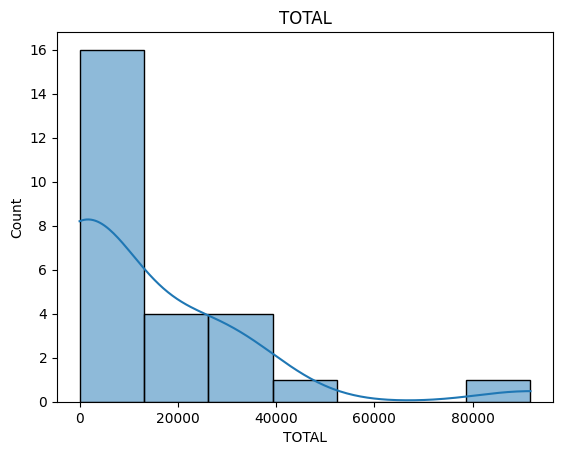

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importación de Seaborn

sns.histplot(df['TOTAL'], kde=True)
plt.title('TOTAL')
plt.show()

BOXPLOT - DIAGRAMA DE CAJAS

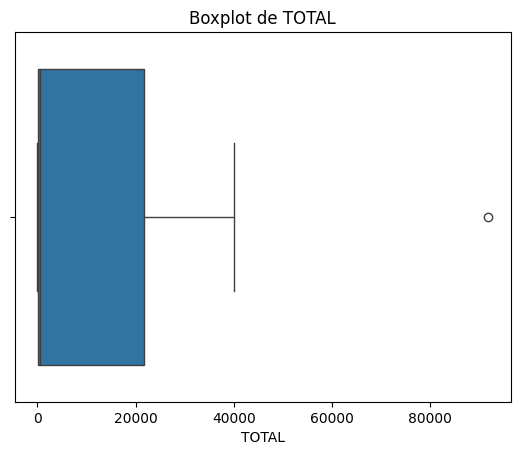

In [ ]:
sns.boxplot(x=df['TOTAL'])
plt.title('Boxplot de TOTAL')
plt.show()

SUBTOTAL

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df)

# Selecciona la columna para la tabla de frecuencias
columna = 'SUBTOTAL'

# Frecuencia absoluta
frecuencia_absoluta = df[columna].value_counts().sort_index()

# Frecuencia relativa
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()

# Frecuencia acumulada
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

          Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
SUBTOTAL                                                                
0.88                        1             0.038462                     1
4.46                        1             0.038462                     2
10.00                       1             0.038462                     3
26.00                       2             0.076923                     5
36.65                       1             0.038462                     6
58.04                       1             0.038462                     7
66.96                       1             0.038462                     8
73.39                       1             0.038462                     9
120.13                      1             0.038462                    10
139.02                      1             0.038462                    11
399.13                      2             0.076923                    13
514.02                      2             0.076923 

DATOS AGRUPADOS

In [ ]:
df_int = pd.DataFrame(df)

# Generar intervalos automáticos con un número definido de bins
df['Intervalos'] = pd.cut(df['SUBTOTAL'], bins=4, include_lowest=True)

# Calcular frecuencias
frecuencia_absoluta = df['Intervalos'].value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla de frecuencias
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

                      Frecuencia Absoluta  Frecuencia Relativa  \
Intervalos                                                       
(-81.075, 20489.5]                     19             0.730769   
(20489.5, 40978.12]                     6             0.230769   
(40978.12, 61466.74]                    0             0.000000   
(61466.74, 81955.36]                    1             0.038462   

                      Frecuencia Acumulada  
Intervalos                                  
(-81.075, 20489.5]                      19  
(20489.5, 40978.12]                     25  
(40978.12, 61466.74]                    25  
(61466.74, 81955.36]                    26  


HISTOGRAMA/BARRAS

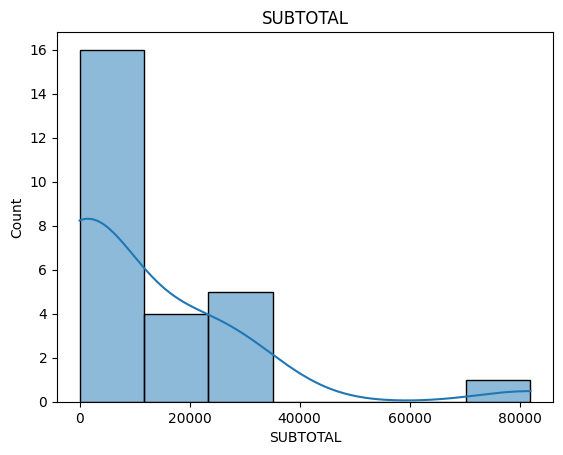

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importación de Seaborn

sns.histplot(df['SUBTOTAL'], kde=True)
plt.title('SUBTOTAL')
plt.show()

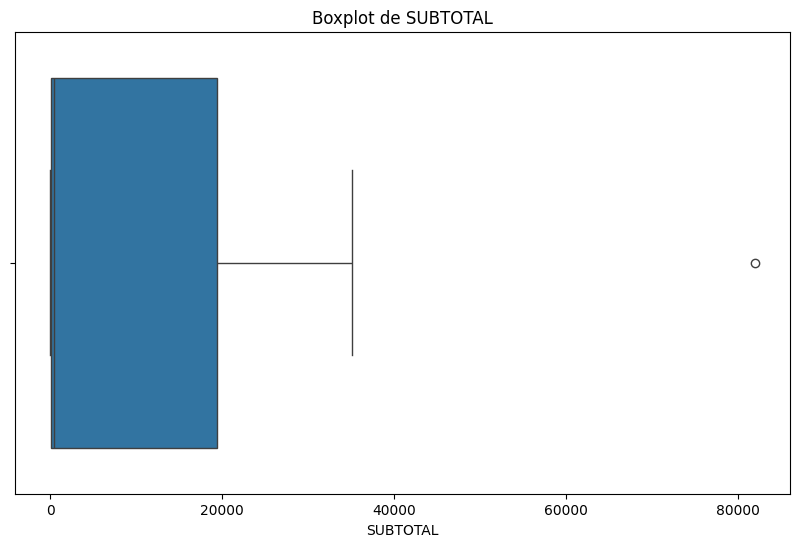

In [ ]:
# Verificación de valores atípicos (outliers) en 'SUBTOTAL'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['SUBTOTAL'])
plt.title('Boxplot de SUBTOTAL')
plt.show()

IVA

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df)

# Selecciona la columna para la tabla de frecuencias
columna = 'IVA'

# Frecuencia absoluta
frecuencia_absoluta = df[columna].value_counts().sort_index()

# Frecuencia relativa
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()

# Frecuencia acumulada
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

         Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
IVA                                                                    
0.00                       2             0.111111                     2
0.11                       1             0.055556                     3
0.54                       1             0.055556                     4
5.50                       1             0.055556                     5
6.96                       1             0.055556                     6
8.04                       1             0.055556                     7
8.81                       1             0.055556                     8
59.87                      1             0.055556                     9
61.68                      1             0.055556                    10
1331.90                    1             0.055556                    11
1691.79                    1             0.055556                    12
1897.98                    1             0.055556               

DATOS AGRUPADOS

In [ ]:
df_int = pd.DataFrame(df)

# Generar intervalos automáticos con un número definido de bins
df['Intervalos'] = pd.cut(df['IVA'], bins=4, include_lowest=True)

# Calcular frecuencias
frecuencia_absoluta = df['Intervalos'].value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Crear tabla de frecuencias
tabla = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada': frecuencia_acumulada
})

print(tabla)

                    Frecuencia Absoluta  Frecuencia Relativa  \
Intervalos                                                     
(-4.913, 1228.04]                    10             0.555556   
(1228.04, 2456.08]                    4             0.222222   
(2456.08, 3684.12]                    3             0.166667   
(3684.12, 4912.16]                    1             0.055556   

                    Frecuencia Acumulada  
Intervalos                                
(-4.913, 1228.04]                     10  
(1228.04, 2456.08]                    14  
(2456.08, 3684.12]                    17  
(3684.12, 4912.16]                    18  


HISTOGRAMA/BARRAS

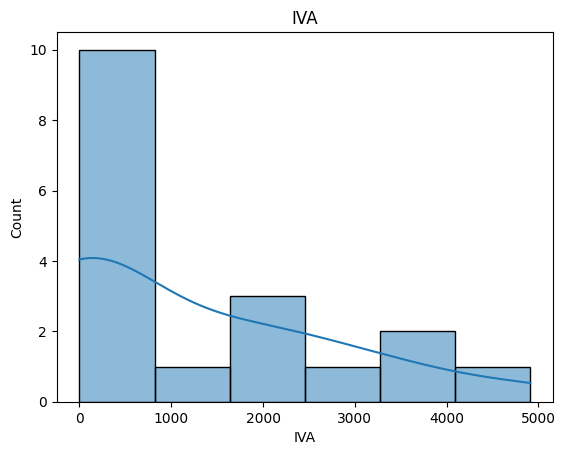

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Importación de Seaborn

sns.histplot(df['IVA'], kde=True)
plt.title('IVA')
plt.show()

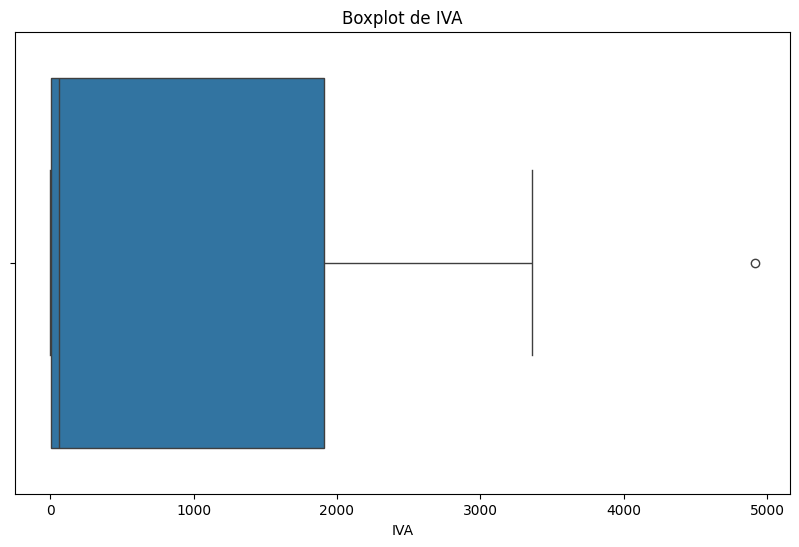

In [ ]:
# Verificación de valores atípicos (outliers) en 'IVA'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['IVA'])
plt.title('Boxplot de IVA')
plt.show()

MEDIDAS DE TENDENCIA CENTRAL PARA LAS VARIABLES NUMÉRICAS

TOTAL, valores por monto total de factura, se observa que la curtosis es -1.0, donde existen valores grandes que llevan la variable hacia la derecha, es decir, los totales de una factura completa ejercen mayor influencia que los totales de las "incompletas", éstas últimas son valores menores a 1000, y "ensucian" los datos.

In [ ]:
media = df['TOTAL'].mean()
mediana = df['TOTAL'].median()
moda = df['TOTAL'].mode()[0]
asimetria = df['TOTAL'].skew()
curtosis = df['TOTAL'].kurtosis()
minimo = df['TOTAL'].min()
maximo = df['TOTAL'].max()
print(f"Media: {media}, Mediana: {mediana}, Moda: {moda}, Asimetria: {asimetria}, Curtosis: {curtosis}, Minimo: {minimo}, Maximo: {maximo}")

Media: 12703.33, Mediana: 517.35, Moda: 26.0, Asimetria: 2.413881712630486, Curtosis: 7.439068287254383, Minimo: 0.99, Maximo: 91790.0


SUBTOTAL, de similar comportamiento que el TOTAL, las facturas "completas" se ven "ensuciadas" por las "incompletas", los valores extremos ejercen alta influencia en el data set, y el 50% de ellos son menores a 500, lo que hace que la dispersión cause ruido.  

In [ ]:
media = df['SUBTOTAL'].mean()
mediana = df['SUBTOTAL'].median()
moda = df['SUBTOTAL'].mode()[0]
asimetria = df['SUBTOTAL'].skew()
curtosis = df['SUBTOTAL'].kurtosis()
minimo = df['SUBTOTAL'].min()
maximo = df['SUBTOTAL'].max()
print(f"Media: {media}, Mediana: {mediana}, Moda: {moda}, Asimetria: {asimetria}, Curtosis: {curtosis}, Minimo: {minimo}, Maximo: {maximo}")

Media: 11266.185384615386, Mediana: 456.575, Moda: 26.0, Asimetria: 2.443137729423901, Curtosis: 7.640380458206334, Minimo: 0.88, Maximo: 81955.36


Debido a que los valores son menores que sus avriables predecesoras, el IVA experimenta una concentración de valores menores a los USD 100, tan así es que el 50% es menor que USD 61.  

In [ ]:
media = df['IVA'].mean()
mediana = df['IVA'].median()
moda = df['IVA'].mode()[0]
asimetria = df['IVA'].skew()
curtosis = df['IVA'].kurtosis()
minimo = df['IVA'].min()
maximo = df['IVA'].max()
print(f"Media: {media}, Mediana: {mediana}, Moda: {moda}, Asimetria: {asimetria}, Curtosis: {curtosis}, Minimo: {minimo}, Maximo: {maximo}")

Media: 1311.87, Mediana: 60.775, Moda: 0.0, Asimetria: 2.5255032416088254, Curtosis: 7.78258087989626, Minimo: 0.0, Maximo: 9834.64


MEDIDAS DE DISPERSIÓN

TOTAL

In [ ]:
# Calcular rango, varianza y desviación
rango = df['TOTAL'].max() - df['TOTAL'].min()
varianza = df['TOTAL'].var()
desviacion = df['TOTAL'].std()

print(f"Rango: {rango}, Varianza: {varianza}, Desviación Estándar: {desviacion}")

Rango: 91789.01, Varianza: 435856558.03736, Desviación Estándar: 20877.177923209834


SUBTOTAL

In [ ]:
# Calcular rango, varianza y desviación
rango = df['SUBTOTAL'].max() - df['TOTAL'].min()
varianza = df['SUBTOTAL'].var()
desviacion = df['SUBTOTAL'].std()

print(f"Rango: {rango}, Varianza: {varianza}, Desviación Estándar: {desviacion}")

Rango: 81954.37, Varianza: 344654595.2364259, Desviación Estándar: 18564.87530893827


IVA

In [ ]:
# Calcular rango, varianza y desviación
rango = df['SUBTOTAL'].max() - df['TOTAL'].min()
varianza = df['SUBTOTAL'].var()
desviacion = df['SUBTOTAL'].std()

print(f"Rango: {rango}, Varianza: {varianza}, Desviación Estándar: {desviacion}")

Rango: 81954.37, Varianza: 344654595.2364259, Desviación Estándar: 18564.87530893827


Avanzamos con las variables categóricas
Se realizó una revisión de la distribución de  MODELO, MOTOR, RAMV_CPN, VIN_CHASIS, pero todos tenías valores distintos entonces, no era necesario un análisis de distribución.

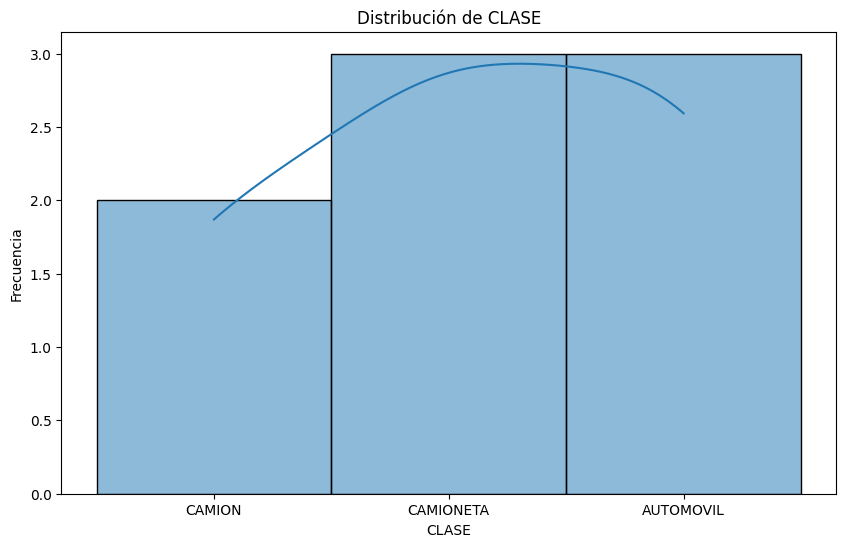

In [ ]:
# Distribución de la columna 'CLASE'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['CLASE'], bins=30, kde=True)
plt.title('Distribución de CLASE')
plt.xlabel('CLASE')
plt.ylabel('Frecuencia')
plt.show()



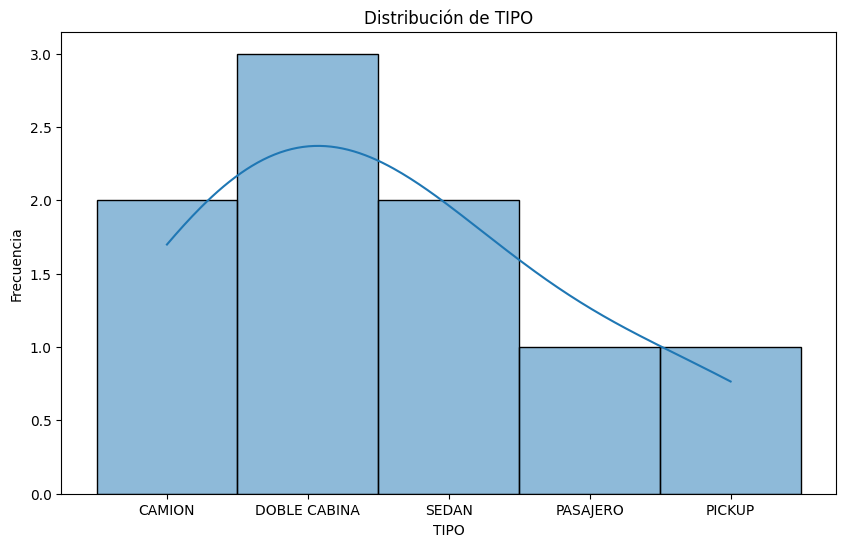

In [ ]:
# Distribución de la columna 'TIPO'
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['TIPO'], bins=30, kde=True)
plt.title('Distribución de TIPO')
plt.xlabel('TIPO')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la camioneta doble cabina, es el vehículo más adquirido, en esta revisión.

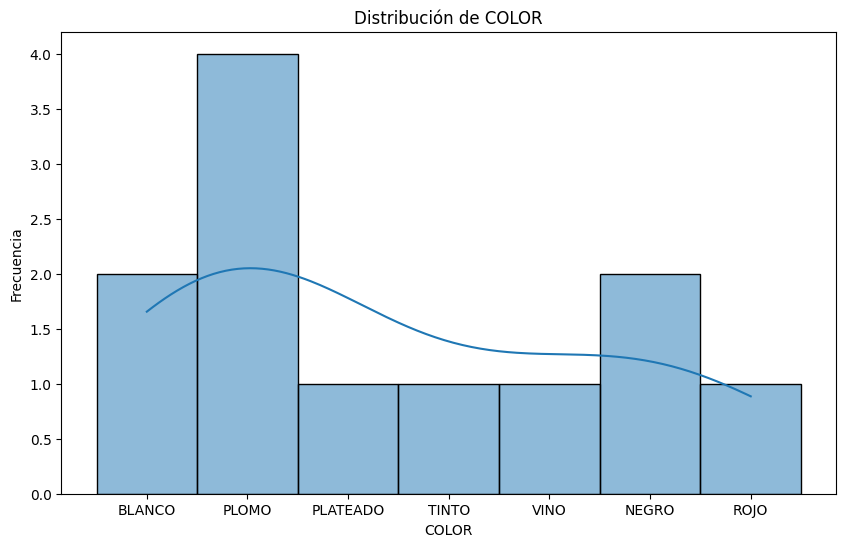

In [ ]:
# Distribución de la columna 'COLOR'
plt.figure(figsize=(10,6))
sns.histplot(df['COLOR'], bins=30, kde=True)
plt.title('Distribución de COLOR')
plt.xlabel('COLOR')
plt.ylabel('Frecuencia')
plt.show()

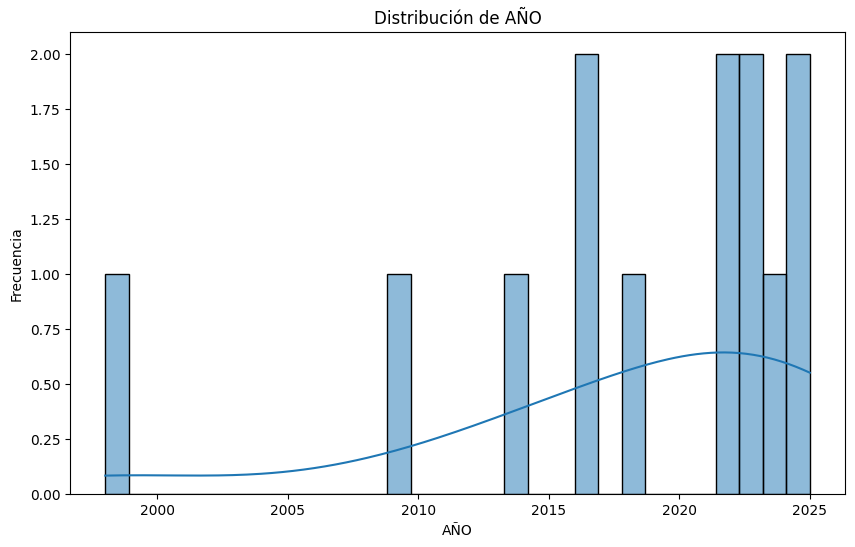

In [ ]:
# Distribución de la columna 'AÑO'
plt.figure(figsize=(10,6))
sns.histplot(df['AÑO'], bins=30, kde=True)
plt.title('Distribución de AÑO')
plt.xlabel('AÑO')
plt.ylabel('Frecuencia')
plt.show()

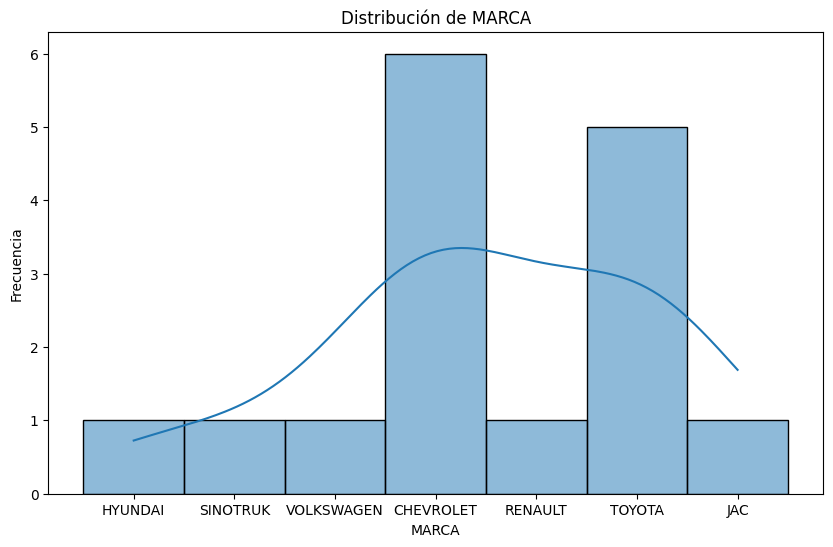

In [ ]:
# Distribución de la columna 'MARCA'
plt.figure(figsize=(10,6))
sns.histplot(df['MARCA'], bins=30, kde=True)
plt.title('Distribución de MARCA')
plt.xlabel('MARCA')
plt.ylabel('Frecuencia')
plt.show()

La marca más adquirida es Chevvrolet, dato interesante, considerando que tamién existe una ligera concentración en CONCESIONARIA, por lo que el origen debe estar altamente relacionado.

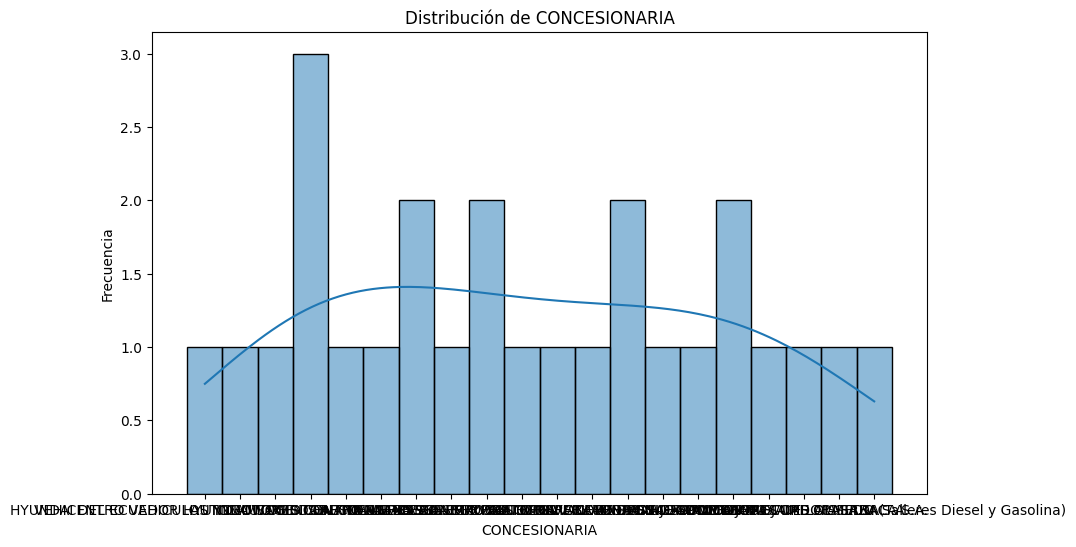

In [ ]:
# Distribución de la columna 'CONCESIONARIA'
plt.figure(figsize=(10,6))
sns.histplot(df['CONCESIONARIA'], bins=30, kde=True)
plt.title('Distribución de CONCESIONARIA')
plt.xlabel('CONCESIONARIA')
plt.ylabel('Frecuencia')
plt.show()

1.3 ANÁLISIS BIVARIADO ENTRE VARIABLES

MONTO MÁS ALTO POR MARCA DE VEHÍCULO


Monto por Marca de vehículo:
MARCA
JAC           91790.0
VOLKSWAGEN    39999.0
HYUNDAI       30400.0
Name: TOTAL, dtype: float64


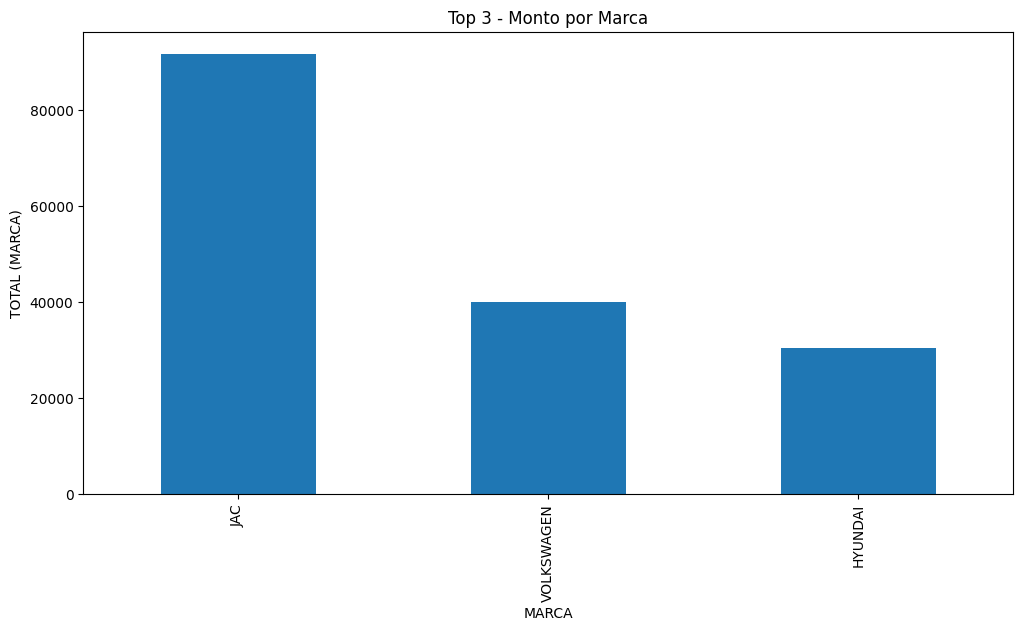

In [ ]:
# Relación entre 'MARCA' y 'TOTAL' (Monto canelado por marca de vehículo)
mean_pay_by_job = df.groupby('MARCA')['TOTAL'].mean().sort_values(ascending=False)
print("\nMonto por Marca de vehículo:")
print(mean_pay_by_job.head(3))  # Mostrar los 3 vehículos con costo más alto

# Visualización del monto por Marca (top 3)
plt.figure(figsize=(12,6))
mean_pay_by_job.head(3).plot(kind='bar')
plt.title('Top 3 - Monto por Marca')
plt.ylabel('TOTAL (MARCA)')
plt.xlabel('MARCA')
plt.show()

CANTIDAD DE CLASE POR TIPO DE VEHÍCULO


Top 3 tipos de vehículos más comunes:
TIPO
CAMION          3
DOBLE CABINA    3
SEDAN           2
Name: count, dtype: int64


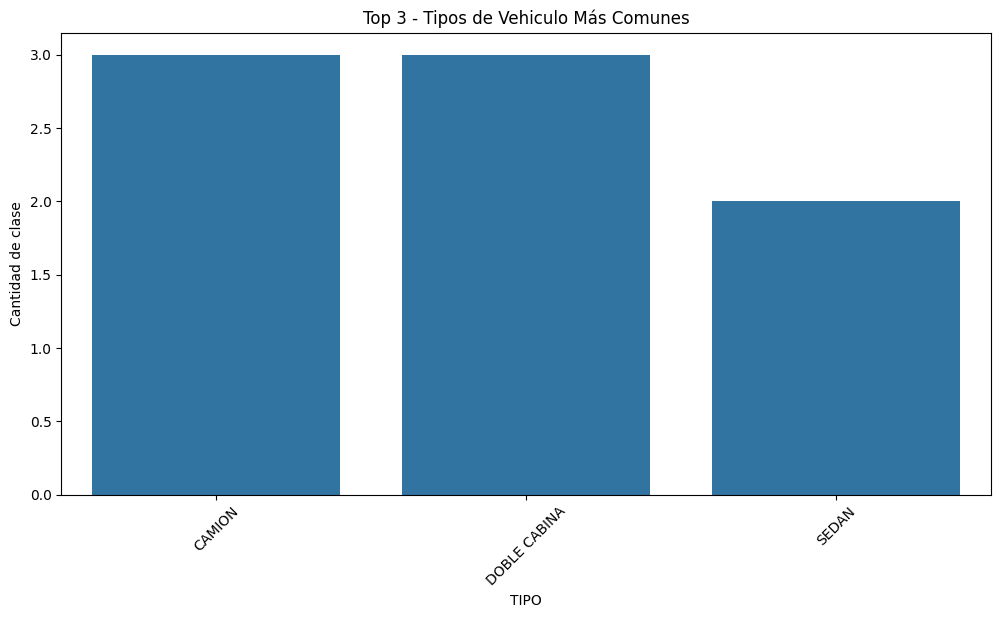

In [ ]:
# Análisis por categoría: Contar la cantidad de CLASE por TIPO
job_count = df['TIPO'].value_counts().head(3)
print("\nTop 3 tipos de vehículos más comunes:")
print(job_count)
# Visualización de los tipos de vehículos más comunes
plt.figure(figsize=(12,6))
sns.barplot(x=job_count.index, y=job_count.values)
plt.title('Top 3 - Tipos de Vehiculo Más Comunes')
plt.ylabel('Cantidad de clase')
plt.xlabel('TIPO')
plt.xticks(rotation=45)
plt.show()

IVA MÁS ALTO POR TIPO DE VEHÍCULO


TIPOS con IVA mayor a 3000: 4
            TIPO      IVA
3   DOBLE CABINA  4912.16
4   DOBLE CABINA  3360.43
8   DOBLE CABINA  3321.32
22           NaN  9834.64


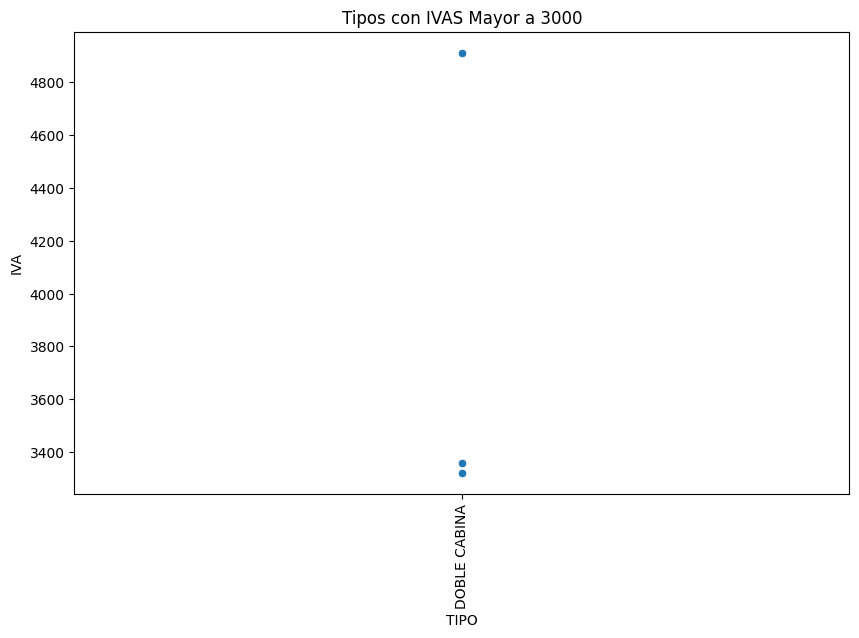

In [ ]:
# Filtrar los tipos con el IVA máS alto
high_salary_jobs = df[df['IVA'] > 3000]
print(f"\nTIPOS con IVA mayor a 3000: {high_salary_jobs.shape[0]}")
print(high_salary_jobs[['TIPO', 'IVA']])

# Visualización de los tipos con los IVAS más altos
plt.figure(figsize=(10,6))
sns.scatterplot(x=high_salary_jobs['TIPO'], y=high_salary_jobs['IVA'])
plt.title('Tipos con IVAS Mayor a 3000')
plt.ylabel('IVA')
plt.xlabel('TIPO')
plt.xticks(rotation=90)
plt.show()

1.4  ANÁLISIS MULTIVARIADO
MAPA DE CALOR DE CORRELACIONES

Como se preveía, las variables TOTAL, SUBTOTAL E IVA, se encuentran altamente correlacionadas, puesto que no son variables independientes, si no que se obtienen a partir de una de ellas (SUBTOTAL).

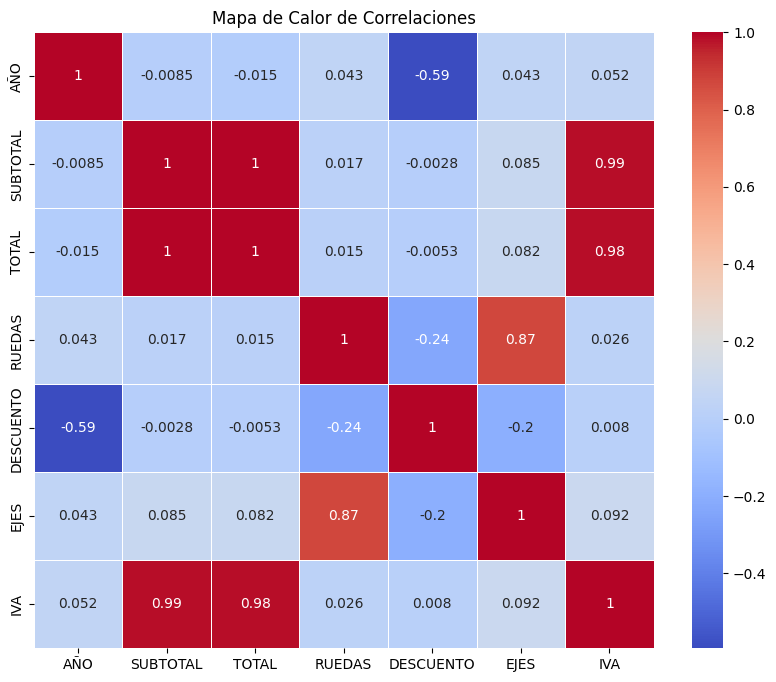

In [ ]:
# Filtrar solo las columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Análisis de correlaciones entre variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

1.6 Variable Objetivo